In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
#!pip install rpy2==3.5.1
from sklearn.decomposition import FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
pd.set_option('display.max_columns', None)
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Ejercicio 1
Considere los datos correspondientes a los gastos que diferentes tipos de
familias hacen en comida. Los tipos de familias son:\\
- (MA) Trabajadores Manuales,

- (EM) Empleados,

- (CA) Jefes,

donde esta clasificación es de acuerdo a la actividad de quienes proveen el
gasto para la casa, los datos provienen de familias en Francia. Por otra parte,
en la clasificación también se considera el número de niños en la familia, de
forma que MA2 denota a una familia donde el soporte económico lo proveen
trabajadores manuales y la cual tiene 2 niños. Se tienen familias con 2, 3, 4 y
5 niños. Los tipos de alimentos son $X1$ = pan, $X2$ = vegetales, $X3$ = frutas,
$X4$ = carne, $X5$ = pollo y aves, $X6$ = leche, $X7$ = vino. Haga un Análisis de
Factores de estos datos. ¿ Cómo se relaciona este análisis con el NPCA que
se llevó a cabo en el primer examen parcial ?

In [2]:
columnas = ['pan','vegetales','frutas','carne','pollo y aves','leche','vino']
dict_ = {}
for index, value in enumerate(columnas):
    dict_[index+1] = value

dict_[0] = 'Tipo de Familia'

In [3]:
food = pd.read_csv('food.dat',header=None,sep=' ').rename(columns=dict_)
y_ = food.iloc[:,0].values.reshape((12,1))
food

,Tipo de Familia,pan,vegetales,frutas,carne,pollo y aves,leche,vino
0,MA2,332,428,354,1437,526,247,427
1,EM2,293,559,388,1527,567,239,258
2,CA2,372,767,562,1948,927,235,433
3,MA3,406,563,341,1507,544,324,407
4,EM3,386,608,396,1501,558,319,363
5,CA3,438,843,689,2345,1148,243,341
6,MA4,534,660,367,1620,638,414,407
7,EM4,460,699,484,1856,762,400,416
8,CA4,385,789,621,2366,1149,304,282
9,MA5,655,776,423,1848,759,495,486


In [4]:
y = ['MA', 'EM', 'CA', 'MA', 'EM', 'CA', 'MA', 'EM', 'CA','MA', 'EM', 'CA']
for index, value in enumerate(y):
    if value == 'MA':
        y[index] = 0
    elif value == 'EM':
        y[index] = 1
    else:
        y[index] = 2

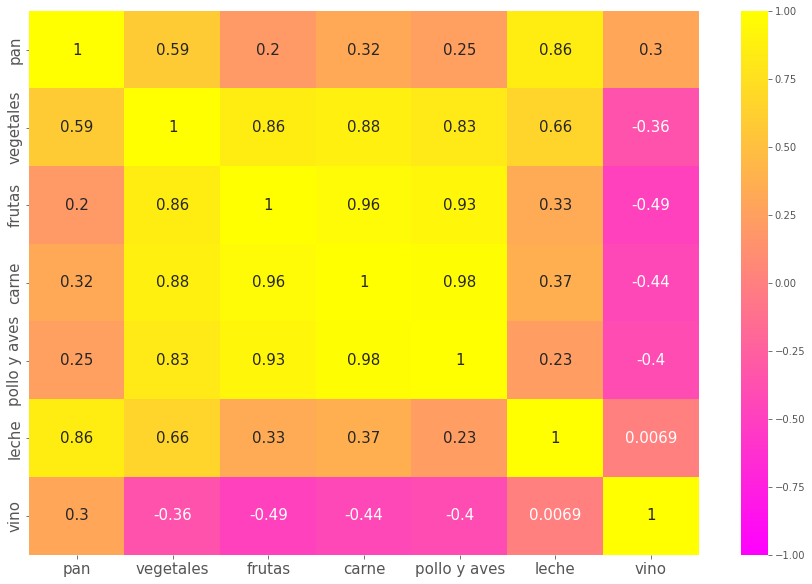

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(food.corr(),annot=True,annot_kws={'fontsize':15},vmin=-1, vmax=1,cmap='spring')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [6]:
#Obtenemos las variables
X = food.iloc[:,1:].values

#Estandarisamos las variables
SC = StandardScaler()
X_std = SC.fit_transform(X)
#Vemos que porcentaje de la varianza explicada podemos obtener tomas n componentes
value, vec = np.linalg.eig(np.corrcoef(X_std.T))
value_ = np.sort(value)[::-1]
componentes = 3
varianza_explicada = np.sum(value_[:componentes])/value_.sum()
varianza_explicada

0.9706234158159143

In [7]:
#Transformamos nuestros datos usando las componenes elegidas
FA = FactorAnalysis(n_components = 3,rotation='varimax')
X_FA = FA.fit_transform(X_std)
X_FA

array([[-1.07492716, -0.90119099,  0.30070703],
       [-0.86403563, -1.09362386,  1.09429429],
       [ 0.54578663, -1.12828213, -0.83952786],
       [-1.04941437, -0.15223751,  0.23842439],
       [-1.00692639, -0.28062287,  0.45501561],
       [ 1.52494151, -0.94952195, -1.11774579],
       [-0.78966141,  0.75967512, -0.79948876],
       [-0.1885647 ,  0.32302927,  0.25872767],
       [ 1.48992528, -0.85734686, -0.10742586],
       [-0.33207614,  1.63510467, -1.48809973],
       [ 0.22771056,  1.39951635, -0.16676895],
       [ 1.51724183,  1.24550075,  2.17188797]])

In [8]:
fad=pd.DataFrame(X_FA,columns=['componente 1', 'componente 2', 'componente 3'])
fad

,componente 1,componente 2,componente 3
0,-1.074927,-0.901191,0.300707
1,-0.864036,-1.093624,1.094294
2,0.545787,-1.128282,-0.839528
3,-1.049414,-0.152238,0.238424
4,-1.006926,-0.280623,0.455016
5,1.524942,-0.949522,-1.117746
6,-0.789661,0.759675,-0.799489
7,-0.188565,0.323029,0.258728
8,1.489925,-0.857347,-0.107426
9,-0.332076,1.635105,-1.488100


In [10]:
fad.index=food.index
fad['index']=food['Tipo de Familia']
fad

,componente 1,componente 2,componente 3,index
0,-1.074927,-0.901191,0.300707,MA2
1,-0.864036,-1.093624,1.094294,EM2
2,0.545787,-1.128282,-0.839528,CA2
3,-1.049414,-0.152238,0.238424,MA3
4,-1.006926,-0.280623,0.455016,EM3
5,1.524942,-0.949522,-1.117746,CA3
6,-0.789661,0.759675,-0.799489,MA4
7,-0.188565,0.323029,0.258728,EM4
8,1.489925,-0.857347,-0.107426,CA4
9,-0.332076,1.635105,-1.488100,MA5


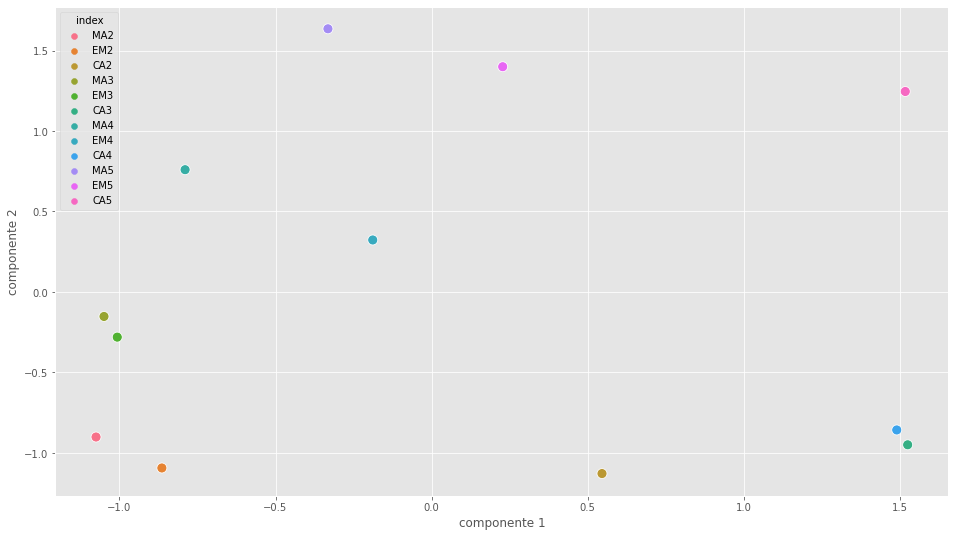

In [11]:
ax = sns.scatterplot(x="componente 1", y="componente 2",hue= 'index', data=fad, s= 100)

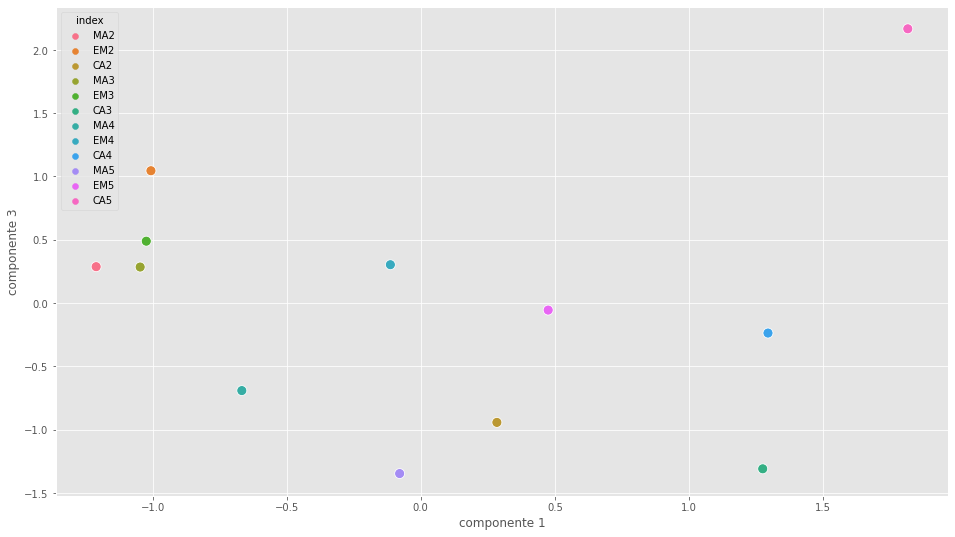

In [10]:
ax = sns.scatterplot(x="componente 1", y="componente 3",hue= 'index', data=fad, s=100)

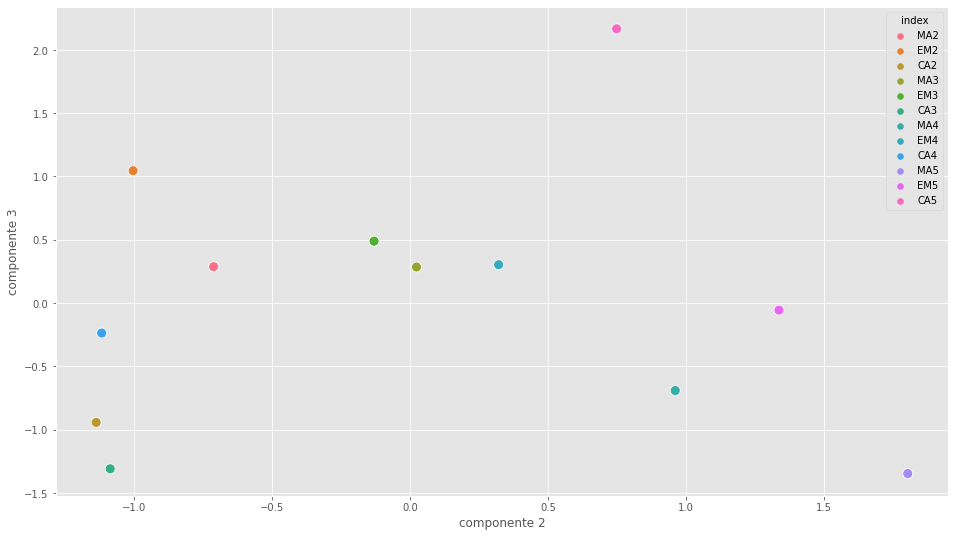

In [11]:
ax = sns.scatterplot(x="componente 2", y="componente 3",hue= 'index', data=fad, s=100)

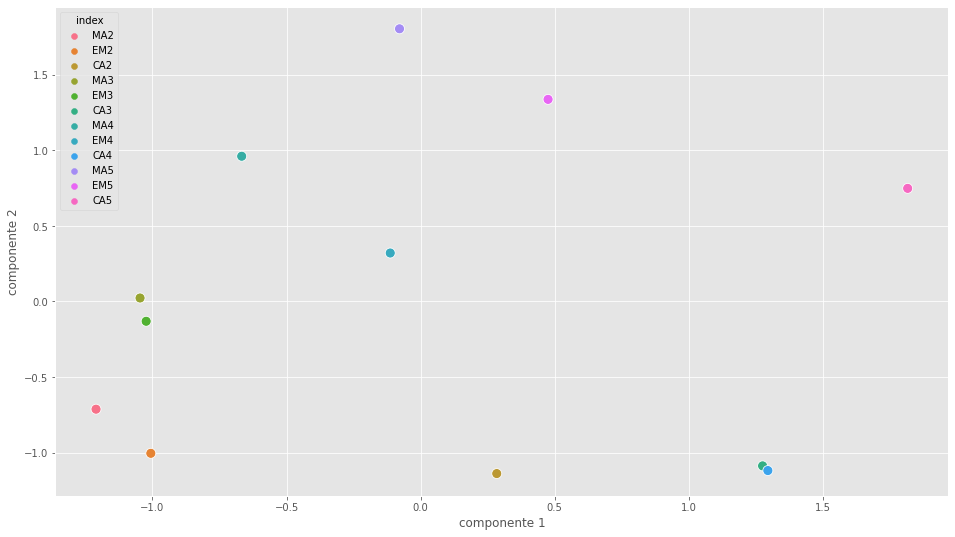

In [12]:
ax = sns.scatterplot(x="componente 1", y="componente 2",hue= 'index', data=fad, s=100)

In [ ]:
fig,ax = plt.subplots()
plt.title('Componente 1 vs Componente 2',fontsize=15)
sns.scatterplot(data=f, hue='comida', x='componente 1', y='componente 2', s=100)
plt.legend(fontsize=15)

plt.show()

In [ ]:
fig,ax = plt.subplots()
plt.title('Componente 1 vs Componente 3',fontsize=15)
sns.scatterplot(data=f, hue='comida', x='componente 1', y='componente 3', s=100)
plt.legend(fontsize=15)

plt.show()

In [ ]:
fig,ax = plt.subplots()
plt.title('Componente 2 vs Componente 3',fontsize=15)
sns.scatterplot(data=f, hue='comida', x='componente 2', y='componente 3', s=100)
plt.legend(fontsize=15)

plt.show()

## Ejercicio 2
Para los datos correspondientes a arrestos por diferentes crímenes en cada
estado de los E.U.A. haga un análisis de conglomerados para cada método
jerárquico mencionado en la Tabla 4.1 del libro de Brian Everitt Cluster
Analysis (tabla entre las páginas 9 y 10 de las notas de clase). ¿ Son ciertas las
afirmaciones sobre las propiedades de cada método jerárquico que se hacen
en la quinta columna de esta tabla ? ¿ Qué método da un resultado más
interpretable y porqué ?

In [ ]:
arr=pd.read_csv('/content/USArrests.txt',sep=' ')
arr.head()

In [ ]:
mat=distance_matrix(arr,arr)
mat.shape
mat

### Single linkage

In [ ]:
import scipy.cluster.hierarchy as shc

plt.title(' Single linkage')
dend=shc.dendrogram(shc.linkage(arr,method='single'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')

### Complete linkage

In [ ]:
plt.title(' complete linkage')
dend=shc.dendrogram(shc.linkage(arr,method='complete'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')

### Average linkage 

In [ ]:
plt.title('Average linkage')
dend=shc.dendrogram(shc.linkage(arr,method='average'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')

### Centroid linkage

In [ ]:
plt.title(' Centroid linkage')
dend=shc.dendrogram(shc.linkage(arr,method='centroid'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')

### Weighted average linkage

In [ ]:
plt.title(' Weighted linkage')
dend=shc.dendrogram(shc.linkage(arr,method='weighted'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')

### Median linkage

In [ ]:
plt.title(' Median linkage')
dend=shc.dendrogram(shc.linkage(arr,method='median'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')

### Ward's method

In [ ]:
plt.title(' Ward method')
dend=shc.dendrogram(shc.linkage(arr,method='ward'),labels=list(arr.index))
#plt.axhline(y=6,color='red',linestyle='--')